In [80]:
# Importa la biblioteca pandas con el alias pd, que se usa para manipulación de datos en estructuras tipo DataFrame.
import pandas as pd

# Importa la biblioteca numpy con el alias np, que se usa para operaciones numéricas avanzadas (aunque en este fragmento no se utiliza).
import numpy as np

# Lee el archivo 'grd_2023.csv' usando como delimitador el símbolo '|' y lo guarda en un DataFrame llamado grd.
grd = pd.read_csv('grd_2023.csv', delimiter='|')

# Muestra las primeras 5 filas del DataFrame grd para una vista preliminar de los datos.
grd.head()

# Lee el archivo 'hospitales.csv', sin encabezado (header=None), y con '|' como delimitador. Guarda el resultado en un DataFrame llamado hospitales.
hospitales = pd.read_csv('hospitales.csv', header=None, delimiter="|")

# Muestra las primeras 5 filas del DataFrame hospitales.
hospitales.head()

# Lee el archivo 'ir-GRD.csv', sin encabezado (header=None), usando '|' como delimitador, y lo guarda en el DataFrame ir.
ir = pd.read_csv('ir-GRD.csv', delimiter='|', header = None)

# Muestra el contenido completo del DataFrame ir.
ir


,0,1
0,11011,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES
1,11012,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W/CC
2,11013,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W...
3,11101,PH CRANEOTOMÍA
4,11102,PH CRANEOTOMÍA W/CC
...,...,...
1061,990089,"INAGRUPABLE, DURACIÓN DE LA ESTANCIA NO VÁLIDA"
1062,990099,"INAGRUPABLE, PACIENTE AMBULATORIO CON PROCED...."
1063,990119,"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA ..."
1064,990129,"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA ..."


In [81]:
grd.columns

Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO',
       'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO', 'FECHAALTA',
       'TIPOALTA', 'DIAGNOSTICO1', 'IR_29301_COD_GRD', 'IR_29301_PESO',
       'IR_29301_SEVERIDAD', 'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA'],
      dtype='object')

In [82]:
# Realiza una combinación (merge) entre los DataFrames grd y hospitales. 
# Se usa 'COD_HOSPITAL' de grd y la columna 0 de hospitales para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, lo que significa que todos los registros de grd estarán en el resultado.
grd_h = pd.merge(grd, hospitales, left_on='COD_HOSPITAL', right_on=0, how='left')

# Elimina la columna 0 del DataFrame resultante, que es la que se utilizó para la combinación y que ya no es necesaria.
grd_h = grd_h.drop(columns=0)

# Renombra la columna 1 del DataFrame resultante a 'NOMBRE_HOSPITAL' para que tenga un nombre más descriptivo.
grd_h = grd_h.rename(columns={1: 'NOMBRE_HOSPITAL'})

# Renombra la columna 'FECHAALTA' a 'FECHA_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"FECHAALTA": 'FECHA_ALTA'})

# Renombra la columna 'TIPOALTA' a 'TIPO_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"TIPOALTA": 'TIPO_ALTA'})

# Muestra las primeras 5 filas del DataFrame grd_h para revisar el resultado de las transformaciones.
grd_h.columns

Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO',
       'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO', 'FECHA_ALTA',
       'TIPO_ALTA', 'DIAGNOSTICO1', 'IR_29301_COD_GRD', 'IR_29301_PESO',
       'IR_29301_SEVERIDAD', 'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA',
       'NOMBRE_HOSPITAL'],
      dtype='object')

In [83]:
# Realiza una combinación (merge) entre los DataFrames grd_h y ir. 
# Se utiliza 'IR_29301_COD_GRD' de grd_h y la columna 0 de ir para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, asegurando que todos los registros de grd_h estén en el resultado.
# Después, se elimina la columna 0 de ir (que se utilizó para la combinación) y se renombra la columna 1 de ir a 'NOMBRE_IR'.
grd_f = pd.merge(grd_h, ir, left_on='IR_29301_COD_GRD', right_on=0, how='left').drop(columns=0).rename(columns={1: 'NOMBRE_IR'})

# Selecciona un subconjunto de columnas del DataFrame grd_f, asegurando que solo se mantendrán las columnas especificadas en la lista.
# Esto reordena las columnas y se asegura de que solo estén las necesarias para el análisis.
grd_f = grd_f[["COD_HOSPITAL", "NOMBRE_HOSPITAL", "CIP_ENCRIPTADO", "SEXO", "FECHA_NACIMIENTO",
               "SERVICIO_SALUD", "TIPO_INGRESO", "FECHA_INGRESO", "FECHA_ALTA", "TIPO_ALTA",
               "DIAGNOSTICO1", "NOMBRE_IR", "IR_29301_COD_GRD", "IR_29301_PESO", "IR_29301_SEVERIDAD",
               "IR_29301_MORTALIDAD", "EDAD","DIAS_ESTANCIA"]]

# Muestra el DataFrame resultante grd_f, que ahora contiene solo las columnas seleccionadas.
grd_f.columns

Index(['COD_HOSPITAL', 'NOMBRE_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO',
       'FECHA_NACIMIENTO', 'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO',
       'FECHA_ALTA', 'TIPO_ALTA', 'DIAGNOSTICO1', 'NOMBRE_IR',
       'IR_29301_COD_GRD', 'IR_29301_PESO', 'IR_29301_SEVERIDAD',
       'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA'],
      dtype='object')

In [84]:
#Vemos quienes murieron y creamos una columna boinaria "Fallecido"
falle = grd_f["TIPO_ALTA"] == "FALLECIDO"
grd_f["FALLECIDO"] = falle.astype(int)
grd_f.head(5)

,COD_HOSPITAL,NOMBRE_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHA_ALTA,TIPO_ALTA,DIAGNOSTICO1,NOMBRE_IR,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,FALLECIDO
0,122100,Hospital Clínico Regional (Valdivia),72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,MH INFECCIONES GASTROINTESTINALES MAYORES,64161.0,0.7094,1.0,1.0,43.0,2,0
1,114101,Complejo Hospitalario Dr. Sótero del Río (San...,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,41301.0,1.0869,1.0,1.0,22.0,6,0
2,114101,Complejo Hospitalario Dr. Sótero del Río (San...,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,MH NEUMONÍA SIMPLE Y TOS FERINA,44161.0,0.4084,1.0,1.0,3.0,1,0
3,106103,Hospital Claudio Vicuña (San Antonio),67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...,131301.0,0.6406,1.0,1.0,45.0,1,0
4,106103,Hospital Claudio Vicuña (San Antonio),100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,"MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...",74131.0,0.5346,1.0,1.0,0.0,2,0


In [85]:
grd_f.columns

Index(['COD_HOSPITAL', 'NOMBRE_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO',
       'FECHA_NACIMIENTO', 'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO',
       'FECHA_ALTA', 'TIPO_ALTA', 'DIAGNOSTICO1', 'NOMBRE_IR',
       'IR_29301_COD_GRD', 'IR_29301_PESO', 'IR_29301_SEVERIDAD',
       'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA', 'FALLECIDO'],
      dtype='object')

In [86]:
grd_f.dtypes

COD_HOSPITAL             int64
NOMBRE_HOSPITAL         object
CIP_ENCRIPTADO         float64
SEXO                    object
FECHA_NACIMIENTO        object
SERVICIO_SALUD          object
TIPO_INGRESO            object
FECHA_INGRESO           object
FECHA_ALTA              object
TIPO_ALTA               object
DIAGNOSTICO1            object
NOMBRE_IR               object
IR_29301_COD_GRD       float64
IR_29301_PESO          float64
IR_29301_SEVERIDAD     float64
IR_29301_MORTALIDAD    float64
EDAD                   float64
DIAS_ESTANCIA            int64
FALLECIDO                int32
dtype: object

In [87]:
grd_f["IR_29301_PESO"]

0          0.7094
1          1.0869
2          0.4084
3          0.6406
4          0.5346
            ...  
1039582    0.5227
1039583    0.1761
1039584    0.7398
1039585    0.3452
1039586    0.5799
Name: IR_29301_PESO, Length: 1039587, dtype: float64

In [88]:
def proc(i):
    u = (i.strip().split())[0]
    return u

In [89]:
grd_f.dropna(inplace=True)

In [90]:
grd_f["AH"] = grd_f["NOMBRE_IR"].apply(lambda x: proc(x))

In [ ]:
#grd_f.drop(["COD_HOSPITAL","NOMBRE_HOSPITAL","CIP_ENCRIPTADO","FECHA_NACIMIENTO",
        "FECHA_INGRESO","FECHA_ALTA", 'IR_29301_SEVERIDAD','IR_29301_MORTALIDAD'
        ,'IR_29301_COD_GRD', 'IR_29301_PESO',"TIPO_ALTA", "NOMBRE_IR", "DIAGNOSTICO1",], axis=1, inplace= True)

In [92]:
grd_f["AH"].unique()

array(['MH', 'PH', 'PA', 'INAGRUPABLE,', 'MA'], dtype=object)

In [93]:
grd_f.head()

,SEXO,SERVICIO_SALUD,TIPO_INGRESO,EDAD,DIAS_ESTANCIA,FALLECIDO,AH
0,HOMBRE,VALDIVIA,URGENCIA,43.0,2,0,MH
2,HOMBRE,METROPOLITANO SURORIENTE,URGENCIA,3.0,1,0,MH
3,MUJER,VALPARAISO SAN ANTONIO,PROGRAMADA,45.0,1,0,PH
4,MUJER,VALPARAISO SAN ANTONIO,URGENCIA,0.0,2,0,MH
5,MUJER,ACONCAGUA,PROGRAMADA,58.0,0,0,PA


In [94]:
u = pd.get_dummies(grd_f)

In [111]:
u.columns

Index(['EDAD', 'DIAS_ESTANCIA', 'FALLECIDO', 'SEXO_HOMBRE', 'SEXO_MUJER',
       'SERVICIO_SALUD_ACONCAGUA', 'SERVICIO_SALUD_ANTOFAGASTA',
       'SERVICIO_SALUD_ARAUCANÍA NORTE', 'SERVICIO_SALUD_ARAUCANÍA SUR',
       'SERVICIO_SALUD_ARAUCO', 'SERVICIO_SALUD_ARICA',
       'SERVICIO_SALUD_ATACAMA', 'SERVICIO_SALUD_AYSEN',
       'SERVICIO_SALUD_BIOBIO', 'SERVICIO_SALUD_CHILOÉ',
       'SERVICIO_SALUD_CONCEPCIÓN', 'SERVICIO_SALUD_COQUIMBO',
       'SERVICIO_SALUD_DEL MAULE', 'SERVICIO_SALUD_DEL RELONCAVÍ',
       'SERVICIO_SALUD_IQUIQUE', 'SERVICIO_SALUD_LIBERTADOR B. O HIGGINS',
       'SERVICIO_SALUD_MAGALLANES', 'SERVICIO_SALUD_METROPOLITANO CENTRAL',
       'SERVICIO_SALUD_METROPOLITANO NORTE',
       'SERVICIO_SALUD_METROPOLITANO OCCIDENTE',
       'SERVICIO_SALUD_METROPOLITANO ORIENTE',
       'SERVICIO_SALUD_METROPOLITANO SUR',
       'SERVICIO_SALUD_METROPOLITANO SURORIENTE', 'SERVICIO_SALUD_OSORNO',
       'SERVICIO_SALUD_TALCAHUANO', 'SERVICIO_SALUD_VALDIVIA',
       'SERVICI

In [ ]:
from sklearn.preprocessing import StandardScaler

features = [col for col in grd_f.columns if col not in ['FALLECIDO', 'cluster']]
X = grd_f[features]
X_scaled = StandardScaler().fit_transform(X)


In [96]:
from sklearn.preprocessing import StandardScaler

X = u
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [121]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
u["cluster"] = kmeans.fit_predict(X_scaled)


c:\Users\joaco\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [122]:
cluster_fallecidos = u.groupby("cluster")["FALLECIDO"].mean().sort_values(ascending=False)
print(cluster_fallecidos)


cluster
5    0.046238
2    0.036685
0    0.030707
4    0.023423
1    0.014796
3    0.000016
Name: FALLECIDO, dtype: float64


In [123]:
from sklearn.preprocessing import StandardScaler

X = u
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [124]:
u.groupby("cluster").mean()


,EDAD,DIAS_ESTANCIA,FALLECIDO,SEXO_HOMBRE,SEXO_MUJER,SERVICIO_SALUD_ACONCAGUA,SERVICIO_SALUD_ANTOFAGASTA,SERVICIO_SALUD_ARAUCANÍA NORTE,SERVICIO_SALUD_ARAUCANÍA SUR,SERVICIO_SALUD_ARAUCO,...,SERVICIO_SALUD_VIÑA DEL MAR QUILLOTA,SERVICIO_SALUD_ÑUBLE,TIPO_INGRESO_OBSTETRICA,TIPO_INGRESO_PROGRAMADA,TIPO_INGRESO_URGENCIA,"AH_INAGRUPABLE,",AH_MA,AH_MH,AH_PA,AH_PH
cluster,,,,,,,,,,,,,,,,,,,,,
0,42.610304,6.713781,0.030707,0.000000,1.000000,0.021380,0.033459,0.020760,0.047444,0.011695,...,0.046303,0.033658,0.139520,0.119096,0.741384,0.000032,0.000000,0.999208,0.000760,0.000000
1,41.343954,4.969195,0.014796,0.000041,0.999959,0.022373,0.037951,0.020096,0.045045,0.011036,...,0.047252,0.030394,0.445893,0.276599,0.277508,0.000000,0.000000,0.000000,0.000045,0.999955
2,42.303735,7.341048,0.036685,1.000000,0.000000,0.021066,0.034604,0.021123,0.041669,0.011467,...,0.045897,0.033467,0.000158,0.121920,0.877922,0.000077,0.000015,0.982499,0.017409,0.000000
3,51.984389,0.064143,0.000016,0.426386,0.573614,0.019273,0.018209,0.016990,0.057434,0.004977,...,0.061267,0.043726,0.000011,0.988864,0.011125,0.008869,0.003903,0.000000,0.987228,0.000000
4,44.424269,5.954384,0.023423,0.428649,0.571351,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.145803,0.297609,0.556589,0.000000,0.000000,0.444198,0.139110,0.416691
5,49.739028,11.307518,0.046238,0.989912,0.010088,0.022567,0.035123,0.023364,0.037164,0.008557,...,0.048210,0.029383,0.000140,0.351722,0.648138,0.000007,0.000000,0.001167,0.000014,0.998812


c:\Users\joaco\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaco\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaco\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaco\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaco\Anaconda3\Lib\site-packages\sklearn\clust

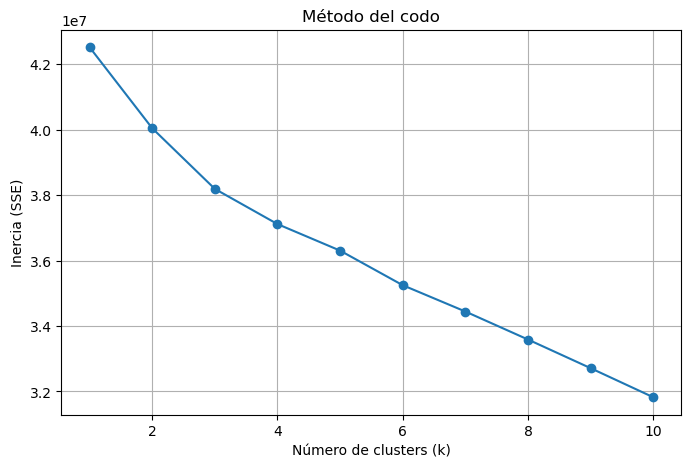

In [112]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Elimina columnas no deseadas
columnas_usar = [col for col in u.columns if col not in ['FALLECIDO', 'cluster']]

# 2. Escala los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(u[columnas_usar])

# 3. Calcular SSE para k = 1 a 10
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# 4. Graficar el codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (SSE)")
plt.grid(True)
plt.show()
